<a href="https://colab.research.google.com/github/imeldp96/qsar_study/blob/main/Support_Vector_Regression_Ismail_Dwi_Putra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Input and Modul Loading

In [1]:
!pip install kennard_stone

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [223]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score, mean_absolute_percentage_error
from sklearn import svm
import kennard_stone as ks

random = 5032024 #random number for consistent results, can be changed to anything

In [4]:
data = pd.read_csv('/content/drive/MyDrive/data/data_ay.csv', index_col=[0], header=[0]) #change accordingly with the location of your csv file


In [5]:
#X= data.drop('LogKow', axis=1) #Select the descriptor's columns
X=data[['X12', 'X25', 'X22']]
y = data['LogKow']  # Setting y as the target variable.
print(X)

            X12   X25   X22
Structures                 
DPA2        169   4.9   3.2
DM-AD2      209   7.2   5.8
IPDM-AD2    251   9.0   1.6
DIP-DPA2    253  19.8  16.0
DIPDM-AD2   293   9.2   3.8
DPPD2       260  23.8   4.9
PTPD2       274  23.1   5.7
DTPD2       288  24.0   3.3
TO-DPA2     281  13.2   4.3
TOS-DPA2    385  16.2   3.3
DTOS-DPA2   479  16.9   1.7
IP-DPA2     211  10.2   4.9
S-DPA2      273  10.8   2.0
DTO-DPA2    293  12.7   9.2


In [6]:
#Kennard-Stone Algorithm for training-test set division
X_train, X_test, y_train, y_test = ks.train_test_split(X, y, test_size=0.2) #change test_size accordingly with the proportion of training-test set

Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.


In [6]:
#Dont run this if you run the KS set division
#only run this if the training and test set has been divided into different rows (delete the """ before running)

X_train = X.iloc[:11] #select rows for train set
X_test = X.iloc[11:14] #select rows for test set

y_train = y.iloc[:11]
y_test = y.iloc[11:14]

In [7]:
print(y_test)

Structures
IP-DPA2      4.75
S-DPA2       5.45
DTO-DPA2    10.33
Name: LogKow, dtype: float64


#SUPPORT VECTOR MACHINE




In [243]:
# fitting
svr = svm.SVR(C=5000, epsilon=0.001, kernel='poly', degree=8)
svr2 = svm.SVR(C=0.1, epsilon=0.001, kernel='linear') #hyperparameter need to be tuned first
svr_fit = svr2.fit(X_train, y_train)

In [244]:
#prediction on the training dataset
ytrain_pred = svr_fit.predict(X_train)
#training model evaluation
#training r-sq
print('The training r_sq is: %.3f'% svr_fit.score(X_train, y_train))
#OOB training
#print('The OOB score is: %.3f'% rf_base.oob_score_)
#RMSE
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))
#MAPE
print('The MAPE is: %.3f'% mean_absolute_percentage_error(y_train, ytrain_pred))

The training r_sq is: 0.972
The RMSE is: 0.466
The MAPE is: 0.061


In [245]:
#prediction on the testing data
ytest_pred = svr_fit.predict(X_test)

#testing coef. of determination
print('The testing r_sq is: %.3f'% r2_score(y_test, ytest_pred))
#model evaluation metrics on test set
#RMSE
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))
#MAPE
print('The MAPE is: %.3f'% mean_absolute_percentage_error(y_test, ytest_pred))

The testing r_sq is: 0.669
The RMSE is: 1.427
The MAPE is: 0.144


In [246]:
#get the predicted targets
df_ytrain = pd.DataFrame(y_train)
df_ytrainpred = pd.DataFrame(ytrain_pred)
df_ytest = pd.DataFrame(y_test)
df_ytestpred = pd.DataFrame(ytest_pred)

print(df_ytrainpred)
print(df_ytestpred)

            0
0    3.499544
1    5.130491
2    5.550397
3    6.199130
4    7.646137
5    3.301271
6    4.184089
7    4.051090
8    6.377920
9    9.680519
10  12.969291
          0
0  4.358043
1  6.116004
2  7.981603


#SVR HYPERPARAMETERS TUNING

In [8]:
#loading the dataset
#import pandas library
import pandas as pd
import numpy as np
from pandas import DataFrame as df
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn import svm

In [9]:
# Instantiate svr on all feature
svr = svm.SVR(C=0.5, epsilon=0.001, kernel='linear')
svr_base = svr.fit(X_train, y_train)

In [10]:
#prediction on the training dataset
ytrain_pred = svr_base.predict(X_train)
#training model evaluation
#training r-sq
print('The training r_sq is: %.3f'% svr_base.score(X_train, y_train))
#the MSE
print('The MSE is: %.3f'% mean_squared_error(y_train, ytrain_pred))
#RMSE
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The training r_sq is: 0.972
The MSE is: 0.217
The RMSE is: 0.466


In [11]:
#prediction on the testing data
ytest_pred = svr_base.predict(X_test)

#testing coef. of determination
print('The testing r_sq is: %.3f'% r2_score(y_test, ytest_pred))
#model evaluation metrics on test set
#the MSE
print('The MSE is: %.3f'% mean_squared_error(y_test, ytest_pred))
#RMSE
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))


The testing r_sq is: 0.669
The MSE is: 2.037
The RMSE is: 1.427


In [12]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(svr_base.get_params())

Parameters currently in use:

{'C': 0.5,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.001,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


Text(0.5, 0, 'Permutation Importance')

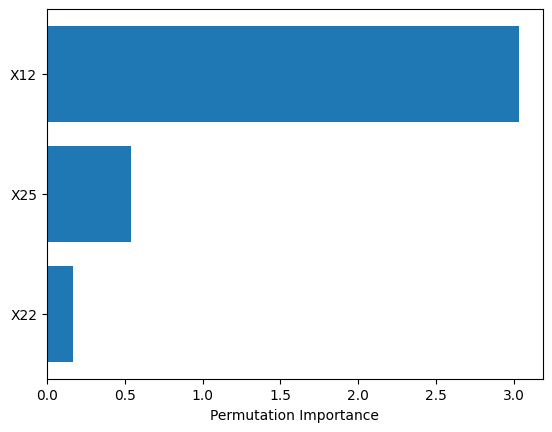

In [13]:
from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

perm_importance = permutation_importance(svr, X_train, y_train)

feature_names = X_train.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

***RandomizedSearchCV***

In [14]:
from sklearn.model_selection import RandomizedSearchCV
# kernel
kernel = ['linear', 'rbf']
# C
C = [int(x) for x in np.logspace(-4, 3, num = 8)]
# epsilon
epsilon = [float(x) for x in np.logspace(-4, 3, num = 7)]
#gamma
gamma = [float(x) for x in np.logspace(-4, 3, num=8)]
# Create the random grid
random_grid = {'kernel': kernel,
               'C': C,
               'epsilon': epsilon,
               'gamma': gamma}
pprint(random_grid)

{'C': [0, 0, 0, 0, 1, 10, 100, 1000],
 'epsilon': [0.0001,
             0.0014677992676220704,
             0.021544346900318846,
             0.31622776601683794,
             4.641588833612782,
             68.12920690579622,
             1000.0],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
 'kernel': ['linear', 'rbf']}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
svr = svm.SVR()
# Random search of parameters, using 4 fold cross validation,
# search across 1500 different combinations, and use all available cores
svr_random = RandomizedSearchCV(estimator = svr, param_distributions = random_grid, n_iter = 1500, cv = 3, verbose=2, scoring=['r2', 'neg_root_mean_squared_error'], refit = 'r2', n_jobs = -1)
# Fit the random search model
svr_random.fit(X_train, y_train)

In [16]:
# Access the randomized hyperparameters and their values
random_params = svr_random.cv_results_

# Convert the randomized hyperparameters to a DataFrame
hyperparameters_rand_df = pd.DataFrame(random_params)

# Save the DataFrame to a CSV file
hyperparameters_rand_df.to_csv('random_hyperparameters.csv')

svr_random.best_params_

{'kernel': 'linear', 'gamma': 0.0001, 'epsilon': 0.31622776601683794, 'C': 1}

In [17]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = svm.SVR(C=2)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 1.4931.
Accuracy = 83.37%.


In [18]:
best_random = svr_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.2790.
Accuracy = 83.85%.
Improvement of 0.58%.


***GridSearchCV***

In [180]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search

param_grid = {
               'kernel': ['linear', 'rbf'],
               'epsilon': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
               'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000]
                }
# Create a based model
svr = svm.SVR()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svr, param_grid = param_grid,
                          cv = 2, n_jobs = -1, verbose = 2, scoring=['r2', 'neg_mean_squared_error'], refit = 'r2', error_score='raise')

In [181]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 392 candidates, totalling 784 fits


{'C': 0.05, 'epsilon': 0.8, 'kernel': 'linear'}

In [182]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = svm.SVR(C=2)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
results = grid_search.cv_results_

Model Performance
Average Error: 1.4931.
Accuracy = 83.37%.
Model Performance
Average Error: 1.4021.
Accuracy = 83.06%.
Improvement of -0.36%.


In [23]:
# Access the randomized hyperparameters and their values
grids_params = grid_search.cv_results_

# Convert the randomized hyperparameters to a DataFrame
hyperparameters_df = pd.DataFrame(grids_params)

# Save the DataFrame to a CSV file
hyperparameters_df.to_csv('grids_hyperparameters.csv')

Parameter Grid

In [228]:
from sklearn.model_selection import ParameterGrid
# Initialize best_score with a low value
best_error = float('inf')
best_score = float('-inf')
best_error_test = float('inf')

param_grid = [
               {'kernel': ['linear', 'rbf'],
               'epsilon': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
               'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000]},
               {'kernel': ['poly'], 'epsilon': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
               'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000],
               'degree': [2,3,4,5,6,7,8,9,10]}
                ]

# Create a based model
svr = svm.SVR()
# Instantiate the grid search model
for g in ParameterGrid(param_grid):
  svr.set_params(**g)
  svr.fit(X_train, y_train)
  score = svr.score(X_train, y_train)
  y_trainpred = svr.predict(X_train)
  error = mean_absolute_percentage_error(y_train, y_trainpred)
  y_testpred = svr.predict(X_test)
  error_test = mean_absolute_percentage_error(y_test, y_testpred)
  #save if best
  if score > best_score and error < best_error and error_test < best_error_test:
    best_score = score
    best_error = error
    best_error_test = error_test
    best_grid = g

print("score: %0.3f" % best_score)
print("error: %0.3f" % best_error)
print("error: %0.3f" % best_error_test)
print("Grid:", best_grid)

score: 0.972
error: 0.061
error: 0.144
Grid: {'C': 0.1, 'epsilon': 0.001, 'kernel': 'linear'}
